# `Module 4`: Introduction to Fully Connected NN

### Problem Statement:

* Fashion MNIST is a dataset comprising 60,000 training images and 10,000 testing images, each depicting various fashion items in a 28x28 grayscale format. The dataset encompasses ten distinct categories of apparel. The primary aim of this assignment is to develop a fully connected neural network (FCNN) that can accurately classify these images into the correct fashion categories.

-------------------------

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torchvision

from torchvision import transforms, datasets
from torch.utils.data import DataLoader, random_split

import torch.nn as nn

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
custom_transfromer = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5)
])

In [ ]:
train_dataset = datasets.FashionMNIST(root='/content/datasets', download=True, train=True, transform=custom_transfromer)
test_dataset = datasets.FashionMNIST(root='/content/datasets', download=True, train=False, transform=custom_transfromer)

In [ ]:
# split the train data into train & validate
train_size = int(0.8 * len(train_dataset))
validate_size = len(train_dataset) - train_size
train_data, validate_data = random_split(train_dataset, [train_size, validate_size])

In [ ]:
# data loader
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
validate_loader = DataLoader(validate_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

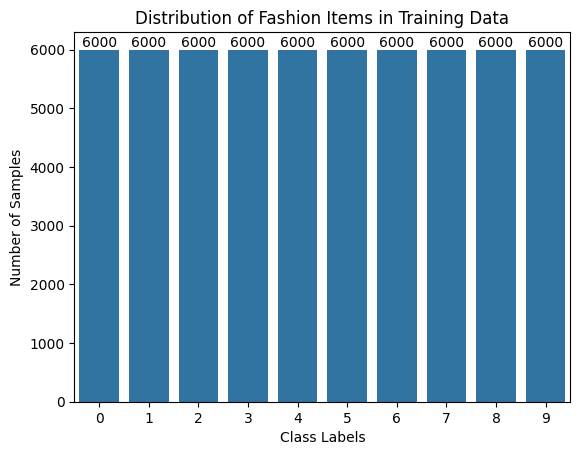

In [ ]:
# Visualize class distribution
labels = np.array([label for _, label in train_dataset])
unique_label, count = np.unique(labels, return_counts=True)
ax = sns.barplot(x=unique_label, y=count)
ax.bar_label(ax.containers[0])
plt.xlabel("Class Labels")
plt.ylabel("Number of Samples")
plt.title("Distribution of Fashion Items in Training Data")
plt.show()

---

In [ ]:
# create FCNN Architecture
class FullyConnectedNN(nn.Module):
    def __init__(self):
        super(FullyConnectedNN, self).__init__()

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.softmax(self.fc3(x))
        return x

In [ ]:
model = FullyConnectedNN().to(device)
print(model)

FullyConnectedNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)


In [ ]:
epoch_size = 25
lr = 0.01

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [ ]:
# train & validate model
train_losses = []
validate_losses = []

for epoch in range(epoch_size):

    model.train()
    total_train_loss = 0
    for train_img, train_lab in train_loader:
        train_img, train_lab = train_img.to(device), train_lab.to(device)

        pred_train_lab = model(train_img)
        optimizer.zero_grad()
        train_loss = criterion(pred_train_lab, train_lab)
        train_loss.backward()
        optimizer.step()

        total_train_loss += train_loss.item()
    train_losses.append(total_train_loss)

    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for val_img, val_lab in validate_loader:
            val_img, val_lab = val_img.to(device), val_lab.to(device)

            pred_val_lab = model(val_img)
            val_loss = criterion(pred_val_lab, val_lab)

            total_val_loss += val_loss.item()
        validate_losses.append(total_val_loss)

    print(f"epoch: {epoch+1}/{epoch_size} train_loss: {total_train_loss:0.4f} validate_loss: {total_val_loss:0.4f} ")

epoch: 1/25 train_loss: 3269.4965 validate_loss: 745.9141 
epoch: 2/25 train_loss: 2791.0869 validate_loss: 674.8329 
epoch: 3/25 train_loss: 2672.9544 validate_loss: 664.4794 
epoch: 4/25 train_loss: 2644.1051 validate_loss: 659.1705 
epoch: 5/25 train_loss: 2612.1126 validate_loss: 647.3923 
epoch: 6/25 train_loss: 2577.7701 validate_loss: 643.2861 
epoch: 7/25 train_loss: 2560.5702 validate_loss: 638.9694 
epoch: 8/25 train_loss: 2548.9494 validate_loss: 636.8715 
epoch: 9/25 train_loss: 2540.6271 validate_loss: 636.0903 
epoch: 10/25 train_loss: 2533.7427 validate_loss: 633.7959 
epoch: 11/25 train_loss: 2528.3302 validate_loss: 632.5495 
epoch: 12/25 train_loss: 2523.6150 validate_loss: 631.6488 
epoch: 13/25 train_loss: 2519.0802 validate_loss: 631.1162 
epoch: 14/25 train_loss: 2516.0884 validate_loss: 630.5675 
epoch: 15/25 train_loss: 2511.9603 validate_loss: 630.9539 
epoch: 16/25 train_loss: 2509.0313 validate_loss: 629.3921 
epoch: 17/25 train_loss: 2506.4410 validate_loss:

In [ ]:
# Evalute the model
model.eval()
with torch.no_grad():
    total_correct = 0
    total = 0
    for test_img, test_lab in test_loader:
        test_img, test_lab = test_img.to(device), test_lab.to(device)

        output = model(test_img)
        pred_test_lab = torch.argmax(output, dim=1)
        correct = (pred_test_lab == test_lab).sum().item()

        total_correct += correct
        total += test_img.size(0)

    print(f"Model Accuracy is {total_correct/total*100:0.2f}%")

Model Accuracy is 78.63%


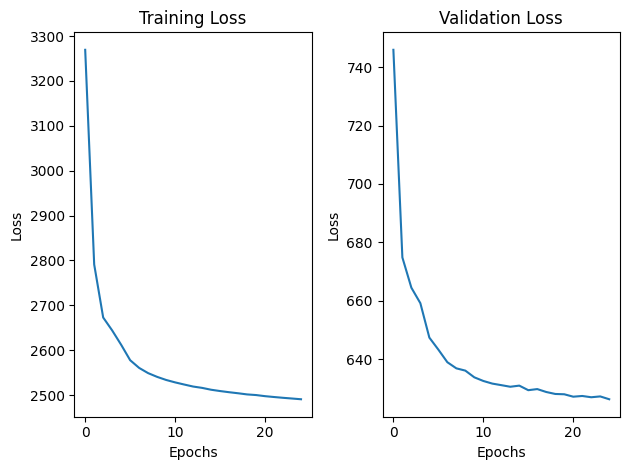

In [ ]:
# visualize training loss and validation loss
plt.subplot(1, 2, 1)
plt.plot(range(epoch_size), train_losses, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Training Loss')

plt.subplot(1, 2, 2)
plt.plot(range(epoch_size), validate_losses, label="Validattion Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Validation Loss')

plt.tight_layout()
plt.show()